<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.

# Оптимизация маркетинговых затрат
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вы изучите:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

## Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

## Отчеты и метрики
Продукт:
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Продажи:
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Маркетинг:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

## Шаг 1. Загрузка данных и подготовка их к анализу. 

In [2]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem()
import matplotlib.pyplot as plt
import seaborn as sns
#для Практикума
#visits = pd.read_csv('/datasets/visits_log.csv')
#orders = pd.read_csv('/datasets/orders_log.csv')
#costs = pd.read_csv('/datasets/costs.csv')
#для локалки
visits = pd.read_csv('C://Users/Ритер/Desktop/GitHub/Data_course/Afisha/visits_log.csv')
orders = pd.read_csv('C://Users/Ритер/Desktop/GitHub/Data_course/Afisha/orders_log.csv')
costs = pd.read_csv('C://Users/Ритер/Desktop/GitHub/Data_course/Afisha/costs.csv')

Рассмотрим каждую таблицу отдельно и приведем в порядок

In [3]:
print(visits.info())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [5]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format ='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format ='%Y-%m-%d %H:%M:%S')

In [6]:
visits.duplicated().sum()

0

In [7]:
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [9]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format ='%Y-%m-%d %H:%M:%S')

In [10]:
orders.duplicated().sum()

0

In [11]:
print(costs.info())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
costs.columns = ['source_id', 'data', 'costs']

In [13]:
costs['data'] = pd.to_datetime(costs['data'], format ='%Y-%m-%d')

In [14]:
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

### Вывод

Я привела даты к формату, чтобы дальше с ними работать было удобнее. Поменяла стиль написания у колонок, чтобы они были одинаковы. Пропусков у нас нет.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ок, из проблем только даты, теперь можно переходить к анализу

## Шаг 2. Отчеты и метрики

Ниже будут отчеты по продукту. Посмотрим сколько людей пользуются продуктом в день/неделю/месяц, т.е. посмотрим DAU, WAU, MAU

In [15]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month 
visits['week'] = visits['start_ts'].dt.week 
visits['day'] = visits['start_ts'].dt.date 

In [16]:
mau = visits.groupby(['year', 'month']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['year', 'week']).agg({'uid':'nunique'}).mean()
dau= visits.groupby('day').agg({'uid':'nunique'}).mean()

In [17]:
print('Количество пользователей в день: {} человек'.format(int(dau)))
print('Количество пользователей в неделю: {} человек'.format(int(wau)))
print('Количество пользователей в месяц: {} человек'.format(int(mau)))

Количество пользователей в день: 907 человек
Количество пользователей в неделю: 5716 человек
Количество пользователей в месяц: 23228 человек


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Параметры рассчитаны верно, но стоило рассмотреть динамику.

Рассчитаем регулярность использования сервисом

In [18]:
print('Степень вовлеченности пользователей в неделю {:.1%}'.format(float(dau/wau)))
print('Степень вовлеченности пользователей в месяц {:.1%}'.format(float(dau/mau)))

Степень вовлеченности пользователей в неделю 15.9%
Степень вовлеченности пользователей в месяц 3.9%


Кроме Sticky factor посмотрим на характер сессий пользователей, чтобы лучше понять регулярность пользования

In [19]:
session_day = visits.groupby(['year','month','day']).agg({'uid':['count','nunique']}).reset_index()
session_day.columns = ['year','month','day', 'cnt_ses', 'n_users']
session_day['session_per_user'] = session_day['cnt_ses'] / session_day['n_users']
print('Среднее количество сессий в день на пользователя: {:.2f} сессий'.format(session_day['session_per_user'].mean()))
session_day.head()

Среднее количество сессий в день на пользователя: 1.08 сессий


,year,month,day,cnt_ses,n_users,session_per_user
0,2017,6,2017-06-01,664,605,1.097521
1,2017,6,2017-06-02,658,608,1.082237
2,2017,6,2017-06-03,477,445,1.071910
3,2017,6,2017-06-04,510,476,1.071429
4,2017,6,2017-06-05,893,820,1.089024


Привычнее рассматривать время в минутах, поэтому я перевожу в них и буду рассматривать графики тоже в них

Text(0.5, 0, 'длина сессии, мин.')

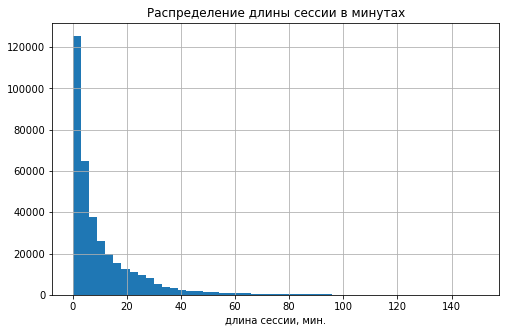

In [20]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_min'] = visits['session_duration_sec'] / 60
plt.figure(figsize=(8, 5))
visits['session_duration_min'].hist(bins=50, range=(0,150))
plt.title('Распределение длины сессии в минутах')
plt.xlabel('длина сессии, мин.')

Так как у нас не нормально распределение, то нужно рассматривать не только среднее и медиану, но и моду тоже.

In [21]:
print('Средняя продолжительность сессии: {:.0f} минут'. format(visits['session_duration_min'].mean()))
print('Медиана продолжительности сессии: {:.0f} минут'. format(visits['session_duration_min'].median()))
print('Мода продолжительности сессии: {} минута'. format(int(visits['session_duration_min'].mode())))

Средняя продолжительность сессии: 11 минут
Медиана продолжительности сессии: 5 минут
Мода продолжительности сессии: 1 минута


Рассмотрим различаются ли сессии на разных устройствах

Text(0, 0.5, 'длина сессии, мин.')

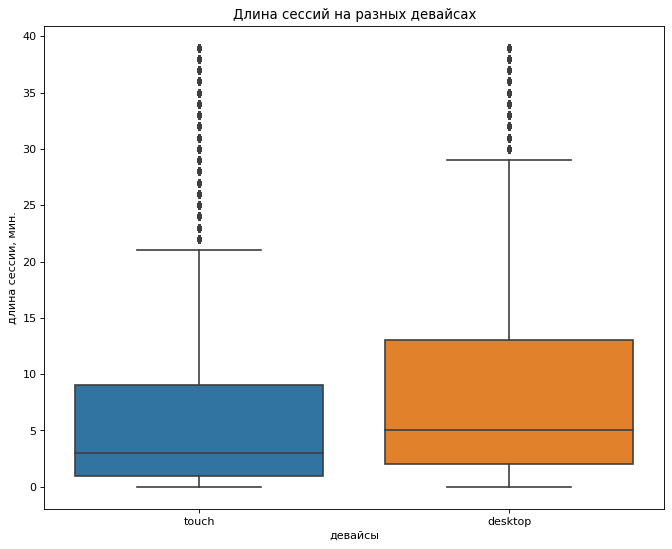

In [22]:
plt.figure(figsize=(10, 8), dpi= 80)
sns.boxplot(x='device', y='session_duration_min', data=visits[visits['session_duration_min'] < 40])
plt.title('Длина сессий на разных девайсах')
plt.xlabel('девайсы')
plt.ylabel('длина сессии, мин.')

In [23]:
print('Средняя продолжительность сессии на мобильных: {:.0f} минут'. format(visits[visits['device'] == 'touch']['session_duration_min'].mean()))
print('Средняя продолжительность сессии на компьютерах: {:.0f} минут'. format(visits[visits['device'] == 'desktop']['session_duration_min'].mean()))
print('Медиана продолжительности сессии на мобильных: {:.0f} минуты'. format(visits[visits['device'] == 'touch']['session_duration_min'].median()))
print('Медиана продолжительности сессии на компьютерах: {:.0f} минут'. format(visits[visits['device'] == 'desktop']['session_duration_min'].median()))
print('Мода продолжительности сессии на мобильных: {} минута'. format(int(visits[visits['device'] == 'touch']['session_duration_min'].mode())))
print('Мода продолжительности сессии на компьютерах: {} минута'. format(int(visits[visits['device'] == 'desktop']['session_duration_min'].mode())))

Средняя продолжительность сессии на мобильных: 8 минут
Средняя продолжительность сессии на компьютерах: 12 минут
Медиана продолжительности сессии на мобильных: 3 минуты
Медиана продолжительности сессии на компьютерах: 6 минут
Мода продолжительности сессии на мобильных: 1 минута
Мода продолжительности сессии на компьютерах: 1 минута


Т.к. длина сессии отличается на устройствах можно посмотреть где больше нулевых и коротких сессии. Смотреть будем по секундам. Короткую сессию возьмем до 60 секунд(наша мода)

In [24]:
print('Всего сессий на мобильных: {} шт.'.format(len(visits.query('device == "touch"'))))
print('Всего сессий на компьютерах: {} шт.'.format(len(visits.query('device == "desktop"'))))
print('Количество коротких сессий на мобильных: {} шт.'.format(len(visits.query('device == "touch" & session_duration_sec < 60'))))
print('Количество коротких сессий на компьютерах: {} шт.'.format(len(visits.query('device == "desktop" & session_duration_sec < 60'))))

Всего сессий на мобильных: 96833 шт.
Всего сессий на компьютерах: 262567 шт.
Количество коротких сессий на мобильных: 12319 шт.
Количество коротких сессий на компьютерах: 24343 шт.


Отличается ли длина сессии от месяца к месяцу?

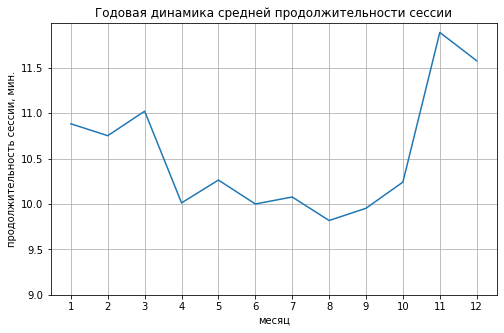

In [25]:
plt.figure(figsize=(8, 5))
visits.groupby('month')['session_duration_min'].mean().plot(x='day', y='session_duration_min', grid=True)
plt.title('Годовая динамика средней продолжительности сессии')
plt.xticks(np.arange(1, 13, step=1))
plt.yticks(np.arange(9, 12, step=0.5))
plt.xlabel('месяц')
plt.ylabel('продолжительность сессии, мин.')
plt.show()

В среднем на 1 пользователя выходит 1.08 сессия в день, а сама сессия чаще всего длиться 1 минуту(мода). 

Различия в длине сессии по устройствам есть, на мобильных она короче. Мода на обоих устройствах не отличается от всей выборки, но среднее и медианное значения отличаются в 1,5 и 2 раза между устройствами соответственно. В устройствах есть и различия по количеству сессий, на мобильных оно в 2,7 раза меньше(96833 и 262567 шт.) и количество коротких сессий на мобильных почти в 2 раза меньше(12319 и 24343 шт.) по сравнению с компьютером. Можно предположить, что на мобильных устройствах сервис менее удобен для пользователя.

Есть просадка по длине сессии с апреля по август. Здесь есть предположение, что в холодное время года люди меньше гуляют на улице и соответственно ходят больше в кино и на мероприятия.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Сессии проанализированы отлично, очень подробно.

Длина сессий небольшая, нужно понять как часто возвращаются пользователи. Может retention будет высоким?

In [26]:
#выясним когда у посетителя был "первый контакт" с сервисом и соединим с таблицей посещений
first_case = visits.groupby(['uid'])['start_ts'].min()
first_case.name = 'first_activity_date'
visits = visits.merge(first_case, on='uid')
#из месяца активности вычестаем месяц первой активности
visits['first_act_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['act_month'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = round(((visits['act_month'] - visits['first_act_month']) / np.timedelta64(1, 'M'))).astype('int64')

In [27]:
#сгруппирую когорты по первому месяцу активности и посчитаем сколько было уникальных посетителей
cohorts = visits.groupby(['first_act_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#посчитаю сколько было посетителей на нулевой перид и добавлю к тиаблице когорт
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_act_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_act_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [28]:
retention = cohorts.pivot_table(index='first_act_month', columns = 'cohort_lifetime', values='retention', aggfunc='sum')
retention.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_act_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


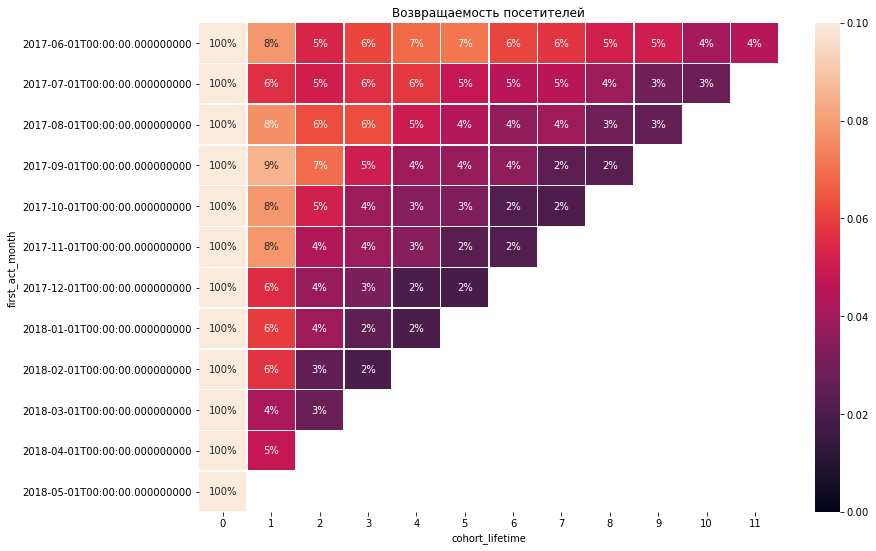

In [29]:
plt.figure(figsize=(13, 9))
plt.title('Возвращаемость посетителей')
sns.heatmap(retention, annot=True, fmt='.0%', linewidths=.5, vmin=0.00, vmax=0.1)
plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

retention рассчитан верно, отличная тепловая карта.

### Вывод

Sticky factor в месяц можно увеличить, на мой взгляд. Например, с помощью напоминания о продукте email. Сама длина сессии в 1 минуту говорит, что обычно посетитель обычно мало времени проводит на сервисе, особенно проседают "теплые" времена года. Можно повысить вовлеченность созданием целевого контента для посетителя(например, уведомлять больше о мероприятиях на свежем воздухе). Я не нашла в интерфейсе сайта возможности поделиться событием с другими людьми, что создало бы большую вовлеченность для посетителя. Можно было бы поделиться событием и обсудить его.

Из тепловой карты мы получаем, что возврат после октября 2017 года падает. И в целом возвращаемость на сервис очень маленькая (максимально - 9%). И опять видно, что больше всего возвращаются именно в холодное время года. Из этого можно извлечь выгоду, если предлагать скидки или эксклюзивные предложения именно в месяцы, когда люди больше пользуются Яндекс.Афишей. Они все равно тут, но таким образом можно повысить их лояльность.

Ниже будут отчеты по продажам

Нужно понять на каком этапе своей жизни в сервисе посетитель становится покупателем

In [30]:
print('{:.0%} не купили вообще на сервисе'.format(1 - (orders['uid'].nunique() / visits['uid'].nunique())))

84% не купили вообще на сервисе


In [31]:
#найдем дату первой покупки и соединим с таблицей посещений, т.к. в ней у нас уже есть дата первой активности
first_buy = orders.groupby('uid')['buy_ts'].min().reset_index()
first_buy.columns = ['uid','first_buy_date']
first_buy['first_buy_month'] = first_buy['first_buy_date'].astype('datetime64[M]')
vis_buy = visits.merge(first_buy, on='uid')

In [32]:
vis_buy['when_buy'] = round((vis_buy['first_buy_month'] - vis_buy['first_act_month']) / np.timedelta64(1, 'D')).astype('int64')
vis_buy['when_buy_min'] = ((vis_buy['first_buy_date'] - vis_buy['first_activity_date']).dt.seconds) / 60

Text(0.5, 0, 'минуты')

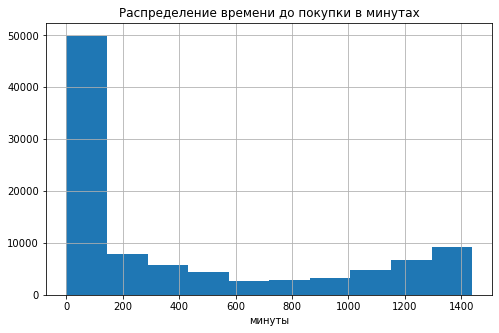

In [33]:
plt.figure(figsize=(8, 5))
vis_buy['when_buy_min'].hist()
plt.title('Распределение времени до покупки в минутах')
plt.xlabel('минуты')

In [34]:
print('Мнимальный срок покупки {:.0f} минут'.format(vis_buy['when_buy_min'].min()))
print('Максимальный срок покупки {:.0f} часа'.format(vis_buy['when_buy_min'].max() / 60))
print('В среднем покупать начинают {:.0f} часов'.format(vis_buy['when_buy_min'].mean() / 60))
print('Чаще всего покупать начинают {} минут'.format(int(vis_buy['when_buy_min'].mode())))

Мнимальный срок покупки 0 минут
Максимальный срок покупки 24 часа
В среднем покупать начинают 7 часов
Чаще всего покупать начинают 0 минут


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все верно.

Исходя из распределения по времени до покупки и по распределению о длине сессии можно предположить, что пользователи заходят на сервис, уже зная о том, что хотят посетить и сразу покупают это. Другие люди уже выбирают и строят планы на свой досуг максимально 1 сутки. т.е. у нас сделка очень быстро происходит после первого посещения. 

Нужно понять у нас это одноразовые сделки или есть повторные и много ли их в нашей выборке. Если повторных покупок мало, то можно было бы направить силы маркетинга в сторону повышения повторных продаж. 

In [35]:
second_buy = orders.groupby('uid')['buy_ts'].count().reset_index()
second_buy.columns = ['uid','count_buy']
second_buy.head()

,uid,count_buy
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


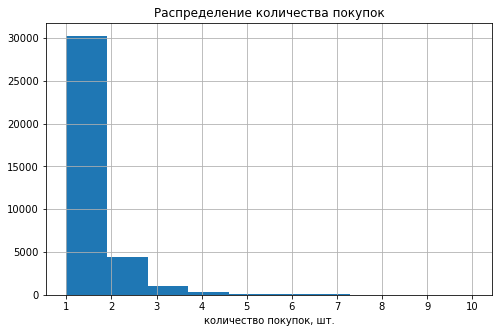

Количество повторных продаж 6292 шт. это 21%
Максимальное количество продаж на посетителя 239 шт.


In [36]:
plt.figure(figsize=(8, 5))
second_buy['count_buy'].hist(range=(1,10))
plt.xticks(np.arange(1, 11, step=1))
plt.title('Распределение количества покупок')
plt.xlabel('количество покупок, шт.')
plt.show()
print('Количество повторных продаж {0} шт. это {1:.0%}'.format(len(second_buy.query('count_buy > 1')), len(second_buy.query('count_buy > 1')) / len(second_buy.query('count_buy == 1'))))
print('Максимальное количество продаж на посетителя {} шт.'.format(second_buy['count_buy'].max()))

In [37]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Средний чек выборки 5.00 руб.


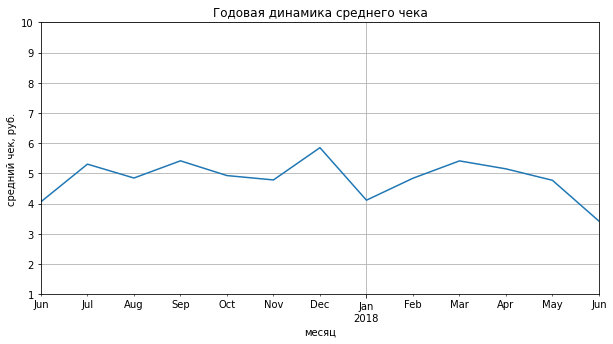

In [38]:
print('Средний чек выборки {:.2f} руб.'.format(orders['revenue'].mean()))

plt.figure(figsize=(10, 5))
orders.groupby('buy_month')['revenue'].mean().plot(grid=True)
plt.yticks(np.arange(1, 11, step=1))
plt.title('Годовая динамика среднего чека')
plt.xlabel('месяц')
plt.ylabel('средний чек, руб.')
plt.show()

Значение среднего чека колеблется между 4 и 6 руб. Есть 4 "пика" - март, июль, сентябрь и декабрь. Также есть 2 спада - это январь и июнь месяцы. Летом падение ожидаемо исходя из предыдущих графиков. Но после "сезонного" декабря январь показывает очень низкое значение среднего чека с учетом, что длина сессии у посетителей в январе почти 11 минут в среднем. Видимо, длина сессии не влияет на выручку. 

Далее рассмотрим сколько денег приносит нам 1 пользователь в среднем.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все верно, отлично, что ты посмотрел динамику среднего чека.

In [39]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_duration_sec,session_duration_min,first_activity_date,first_act_month,act_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [40]:
orders['buy_day'] = orders['buy_ts'].dt.date 
orders.tail()

,buy_ts,revenue,uid,buy_month,buy_day
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-06-01,2018-06-01


In [41]:
orders = orders.merge(visits[['uid','day','source_id','cohort_lifetime']], left_on=['uid','buy_day'], right_on=['uid','day'])
orders.head()

,buy_ts,revenue,uid,buy_month,buy_day,day,source_id,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3,0


In [42]:
cohort_sizes = first_buy.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes = cohort_sizes.drop(12, axis=0)
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [43]:
orders_first_month = pd.merge(orders,first_buy, on='uid')
cohorts = orders_first_month.groupby(['first_buy_month','buy_month']).agg({'revenue': 'sum'}).reset_index()
ltv = pd.merge(cohort_sizes, cohorts, left_on='first_order_month', right_on='first_buy_month')

In [44]:
ltv['age'] = round((((ltv['buy_month'] - ltv['first_buy_month']) / np.timedelta64(1,'M')))).astype('int64')
ltv['ltv'] = ltv['revenue'] / ltv['n_buyers']

In [45]:
ltv_result = ltv.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean')
ltv_result.fillna('')
m6_cum_ltv = ltv_result.cumsum(axis=1).mean(axis=0)[5]
print('Средний LTV за 6 месяцев после первой покупки: {:.2f} руб.'.format(m6_cum_ltv))

Средний LTV за 6 месяцев после первой покупки: 9.16 руб.


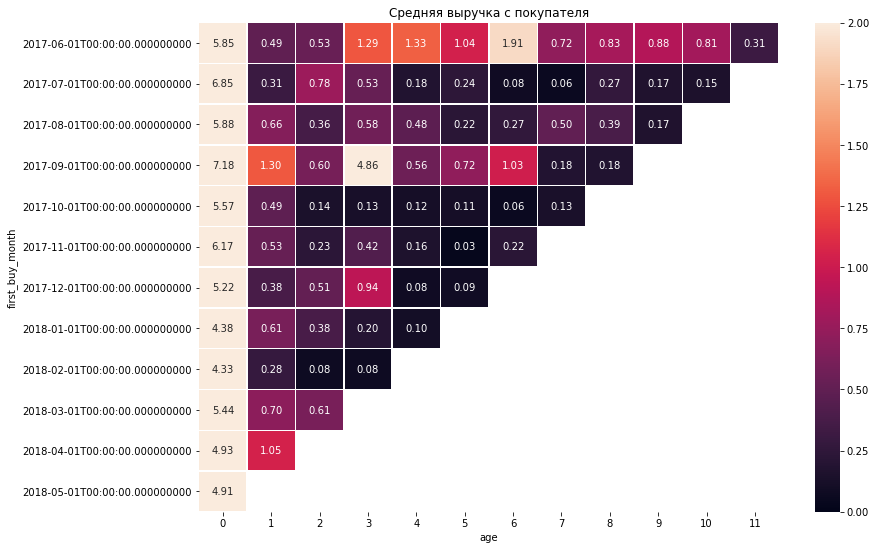

In [46]:
plt.figure(figsize=(13, 9))
plt.title('Средняя выручка с покупателя')
sns.heatmap(ltv_result, annot=True, fmt='.2f', linewidths=.5, vmax=2, vmin=0)
plt.show()

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

LTV рассчитан верно, только стоило отобразить нарастающим итогом, в этом смысл данного показателя.

In [47]:
canals = orders_first_month.groupby('source_id').agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
canals.columns = ['source_id','revenue','n_buyers' ]
canals['ltv_canals'] = round(canals['revenue'] / canals['n_buyers'])
canals.sort_values(by='ltv_canals', ascending=False)

,source_id,revenue,n_buyers,ltv_canals
1,2,69169.15,4591,15.0
0,1,63165.14,5219,12.0
4,5,57089.68,7391,8.0
2,3,42124.75,8995,5.0
3,4,48314.91,9702,5.0
6,9,3802.81,948,4.0
7,10,4367.69,1264,3.0
5,7,1.22,1,1.0


Получается, что у нас 2, 1 и 5 каналы привлекают больше всего посетителей и продаж(ltv 15, 12 и 8 соответственно). 6 канал вообще не привлек ничего, а 7 находится по ltv в самом низу (1). Нужно понять что именно повлияло на высокие показатели привлечения в 2, 1 и 5 канала, а также разобраться почему в 6 и 7 каналах все оказалось так плохо. Можно использовать информацию, что улучшить показатели других каналов привлечения. Либо же вложить больше средств в более успешные каналы, уменьшив доли менее успешных. Если прибыль не вырастет от этих действий, то стоит подумать о новых каналах или перераспределении между текущими каналами.

Ниже будут отчеты по маркетингу

In [48]:
print('Всего было потрачено на привлечение за весь период {} руб.'.format(costs['costs'].sum()))

Всего было потрачено на привлечение за весь период 329131.62 руб.


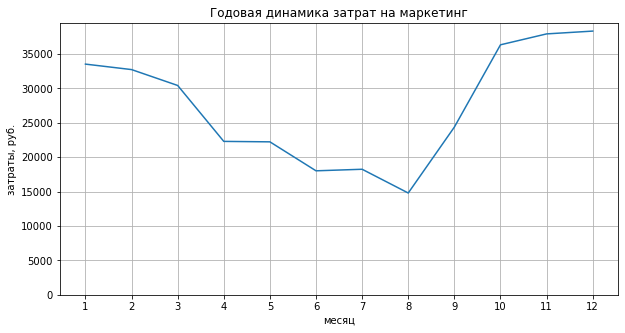

In [49]:
costs['cost_month'] = costs['data'].dt.month

plt.figure(figsize=(10, 5))
costs.groupby('cost_month')['costs'].sum().plot(grid=True)
plt.yticks(np.arange(0, 40000, step=5000))
plt.xticks(np.arange(1, 13, step=1))
plt.title('Годовая динамика затрат на маркетинг')
plt.xlabel('месяц')
plt.ylabel('затраты, руб.')
plt.show()

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Ок, толкьо стоило сразу сделать разбивку по источникам.

In [50]:
costs_canals = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_canals

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [51]:
canals = canals.merge(costs_canals, on='source_id', how='left')

In [52]:
canals = canals.fillna(0)
canals['cac'] = canals['costs'] / canals['n_buyers']
canals['romi'] = canals['ltv_canals'] / canals['cac']
canals.loc[5,'romi'] = 1.22 #заполняю эту ячейлу прибылью с пользователя, т.к. он был 1 и его привлечение стоило 0 руб.
canals

,source_id,revenue,n_buyers,ltv_canals,costs,cac,romi
0,1,63165.14,5219,12.0,20833.27,3.991813,3.006153
1,2,69169.15,4591,15.0,42806.04,9.323903,1.608768
2,3,42124.75,8995,5.0,141321.63,15.711132,0.318246
3,4,48314.91,9702,5.0,61073.60,6.294949,0.794288
4,5,57089.68,7391,8.0,51757.10,7.002720,1.142413
5,7,1.22,1,1.0,0.00,0.000000,1.220000
6,9,3802.81,948,4.0,5517.49,5.820137,0.687269
7,10,4367.69,1264,3.0,5822.49,4.606400,0.651268


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Ок, но стоило отобразить диаграмму.

### Вывод

Самый окупаемый канал оказался 1 канал. 3 источник привлечения нужно дорабатывать, т.к. на него уходит почти столько же средств сколько он приносит прибыли. 7 канал "аномальный" с него пришел всего 1 человек, но затрат на привлечения этого человека не было вообще. Возможно, это источник дополнительного трафика на сервис и стоит вложить средства бюджета в следующем году.

Спад расходов начинается с марта, т.е. опять мы видим, что чаще сервисом пользуются в холоднее время года, когда вообще гулять на улице не хочется.

## Шаг 3. Рекомендации для маркетинга

Я считаю, что стоит дорабатывать обе платформы, чтобы они стали удобнее для быстрого использования. У нас очень много пользователей знают, что они хотят приобрести, т.е. тут работа с поиском, фильтрами, релевантным для пользователей контентом и скоростью работы сервиса. Особенно скорость решает на мобильных из-за мобильного интернет-соединения. Это все я основываю на 1 блоке исследования о длине сессии.

По возвращаемости мы увидели, что интерес пользователей медленно угасает и есть очень сильное влияние времени года на спрос. Нужно учесть, что лето это мертвый сезон. Об этом говорит динамика среднего чека и возвращаемость на сервис.Затраты соответственно тоже самые низкие в году.

По каналам стоит сделать перераспределение бюджета на следующий год. Всего каналов у нас 8 шт. Можно распределить таким образом:
- 1 канал: 25% (самый окупаемый)
- 2 канал: 15%
- 5 канал: 12,5%
- 4 канал: 12,5%
- 9 канал: 12,5%
- 10 канал: 12,5%
- 3 канал: 7%
- 7 канал: 3% (нужно понять сколько он сможет принести прибыли при затратах на привлечение)

Очевидно, что у нас есть просадка летом. Можно было бы выводить больше всяких мероприятий на свежем воздухе либо же те, которые активные. Например, массовый забег.